### Personal Finance Project

In [10]:
import mintapi
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
from config import username, password, spreadsheet_key

In [3]:
mint = mintapi.Mint(
    username,  # Email used to log in to Mint
    password,  # Your password used to log in to mint
 
    # Optional parameters
    mfa_method='sms',  # Can be 'sms' (default), 'email', or 'soft-token'.
                       # if mintapi detects an MFA request, it will trigger the requested method
                       # and prompt on the command line.
    headless=False,  # Whether the chromedriver should work without opening a
                     # visible window (useful for server-side deployments)
    mfa_input_callback=None,  # A callback accepting a single argument (the prompt)
                              # which returns the user-inputted 2FA code. By default
                              # the default Python `input` function is used.
    session_path=None, # Directory that the Chrome persistent session will be written/read from.
                       # To avoid the 2FA code being asked for multiple times, you can either set
                       # this parameter or log in by hand in Chrome under the same user this runs
                       # as.
    imap_account=None, # account name used to log in to your IMAP server
    imap_password=None, # account password used to log in to your IMAP server
    imap_server=None,  # IMAP server host name
    imap_folder='INBOX',  # IMAP folder that receives MFA email
    wait_for_sync=False,  # do not wait for accounts to sync
    wait_for_sync_timeout=300,  # number of seconds to wait for sync
)

In [4]:
transactions = mint.get_transactions()
transactions = transactions.drop(["labels", 'notes', 'original_description'], axis=1)
transactions.loc[(transactions.transaction_type == 'debit'), 'transaction_type'] = 'Expense'
transactions.loc[(transactions.transaction_type == 'credit'), 'transaction_type'] = 'Income'
transactions = transactions[transactions.category != 'credit card payment']

In [11]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('credentials_mint.json', scope)
client = gspread.authorize(creds)
# Send the data to google sheets

d2g.upload(transactions,spreadsheet_key,"RAW_DATA",credentials=creds,row_names=True)

<Worksheet 'RAW_DATA' id:92477778>

In [12]:
transactions.head(5)

,date,description,amount,transaction_type,category,account_name
0,2021-01-03,"SP * THIRDLOVE THIRDLOVE.MYS CA DebitCard, Wit...",54.56,Expense,clothing,SHAREDRAFT CHECKING
1,2021-01-03,"OYISH JAPANESE STEAK HOUS OVIEDO DebitCard, Wi...",6.41,Expense,restaurants,SHAREDRAFT CHECKING
2,2021-01-03,Target,46.06,Expense,shopping,SHAREDRAFT CHECKING
3,2021-01-02,"FABFITFUN 855-3136267 CA 01/02/ DebitCard, Wit...",39.99,Expense,hobbies,SHAREDRAFT CHECKING
4,2021-01-02,Tropical Smoothie Cafe',6.73,Expense,restaurants,SHAREDRAFT CHECKING


In [53]:
# index_names = df[ df['State'] != "FL"].index 
# df.drop(index_names, inplace = True)

transfers = transactions[transactions['category'] == 'transfer'].index
transactions.drop(transfers, inplace=True)
transfers = transactions[transactions['category'] == 'paycheck'].index
transactions.drop(transfers, inplace=True)
transfers = transactions[transactions['category'] == 'income'].index
transactions.drop(transfers, inplace=True)
transactions

,date,description,amount,transaction_type,category,account_name
0,2021-01-03,"SP * THIRDLOVE THIRDLOVE.MYS CA DebitCard, Wit...",54.56,Expense,clothing,SHAREDRAFT CHECKING
1,2021-01-03,"OYISH JAPANESE STEAK HOUS OVIEDO DebitCard, Wi...",6.41,Expense,restaurants,SHAREDRAFT CHECKING
2,2021-01-03,Target,46.06,Expense,shopping,SHAREDRAFT CHECKING
3,2021-01-02,"FABFITFUN 855-3136267 CA 01/02/ DebitCard, Wit...",39.99,Expense,hobbies,SHAREDRAFT CHECKING
4,2021-01-02,Tropical Smoothie Cafe',6.73,Expense,restaurants,SHAREDRAFT CHECKING
...,...,...,...,...,...,...
181,2020-10-09,Target,4.28,Expense,shopping,SHAREDRAFT CHECKING
182,2020-10-09,Jo-Ann Stores,32.58,Expense,hobbies,SHAREDRAFT CHECKING
183,2020-10-07,"BAY ISLANDS COFFEE CO Gaines DebitCard, Withdr...",9.89,Expense,coffee shops,SHAREDRAFT CHECKING
184,2020-10-07,Walgreens,4.27,Expense,pharmacy,SHAREDRAFT CHECKING


In [68]:
#by_cat = transactions.groupby('category').sum()
df = transactions.groupby(['category'])['amount'].sum().reset_index()
df

,category,amount
0,alcohol & bars,91.92
1,arts,22.91
2,charity,45.77
3,clothing,54.56
4,coffee shops,180.30
5,education,129.00
6,electronics & software,39.98
7,entertainment,38.27
8,fast food,209.59
9,financial,8.03


<ipython-input-99-f9f3c91b97f8>:35: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


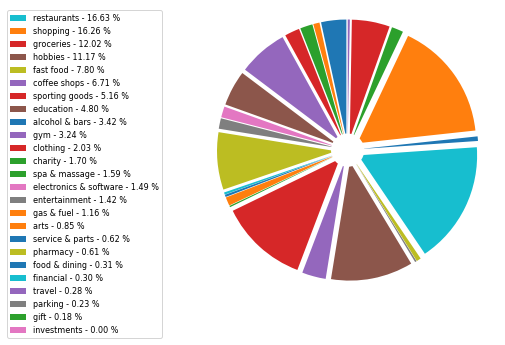

In [99]:
import matplotlib.pyplot as plt
import numpy as np

labels = df['category'].values
by_cat = df['amount']

by_cat_1d = np.array(by_cat).reshape(-1)
by_cat_1d.flatten()

explode = []
for i in by_cat:
    explode.append(0.5)

fig1, ax1 = plt.subplots()
fig1.subplots_adjust(0.3,0,1,1)

porcent = 100.*by_cat/by_cat.sum()

l = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

patches, texts = plt.pie(by_cat_1d, pctdistance=0.85, explode = explode, startangle=90, radius=5)



centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, l, by_cat),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


ax1.axis('equal')
#plt.tight_layout()
plt.show()